# Data Link

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA ###
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Python course files/onlineshop.csv"

df = pd.read_csv(file_path)  #get csv file into a data frame

Mounted at /content/drive


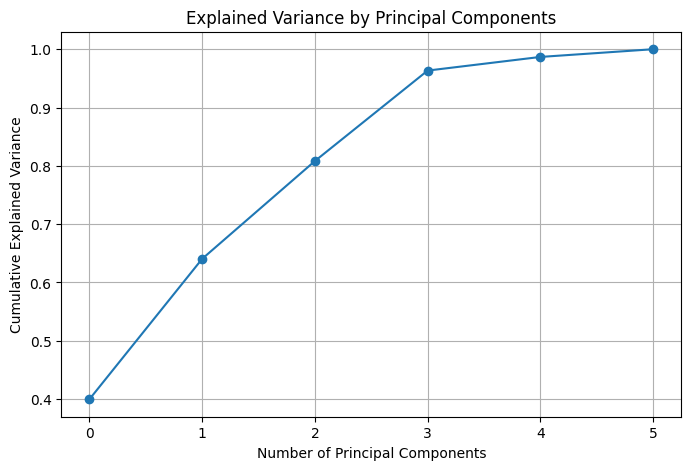

[[-0.47617456 -0.46250779  0.49559874  0.53195146 -0.14951004  0.09165484]
 [ 0.51702621  0.53652191  0.46954764  0.41946449 -0.17959152  0.12708104]
 [-0.022854   -0.04413922 -0.21219914 -0.14908645 -0.53085153  0.80527687]]
Reduced Data Shape: (12330, 3)


In [ ]:

features = ["ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates","PageValues" ,"SpecialDay"] # choose which independent variables I will focus on
X = df[features] # place features into the x
y = df["Revenue"] # revenue is the dependent variable I will be predicting

#y = df["Revenue"].map({"False": 0 , "True": 1}) # Convert target to numbers

X = X.fillna(X.mean()) #fill any missing values in x with the mean
df = df.dropna(subset=['Revenue']) # drop any values that have na in y


# Standardize features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 3 principal components because closest to at least 90% variance)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(PCA(n_components=len(X.columns)).fit(X_scaled).explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.grid()
plt.show()

print(pca.components_)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42) # split data into train and test

# run KNN model
knn = KNeighborsClassifier(n_neighbors=1 )
#knn = KNeighborsClassifier(n_neighbors=1, weights='distance') # Chat gpt improvement  If you have outliers or imbalanced data, you might want to weigh closer neighbors more:

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1878  177]
 [ 203  208]]

Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.91      0.91      2055
        True       0.54      0.51      0.52       411

    accuracy                           0.85      2466
   macro avg       0.72      0.71      0.72      2466
weighted avg       0.84      0.85      0.84      2466



Best k value: 1
Best k based on recall: 1


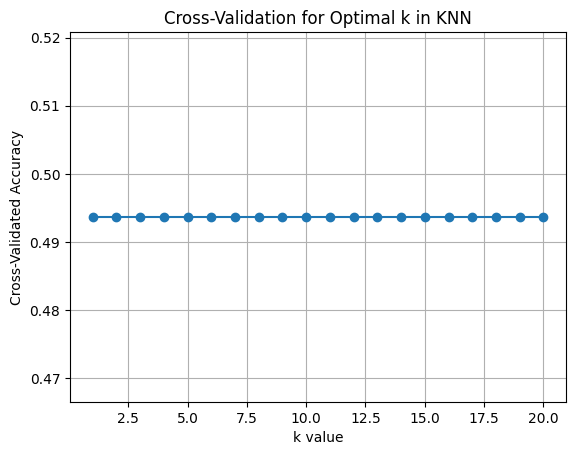

In [ ]:
#cross-validation
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
#accuracy_scores = []
recall_scores = []   # chose recall for this model
#precision_scores = []

for k in k_values:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn_cv, X_train, y_train, cv=5)  # 5-fold cross-validation
    #accuracy_scores.append(scores.mean())

    #scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='precision').mean()
  #precision_scores.append(scores)

    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall').mean()
    recall_scores.append(scores)

# Find the best k
#best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
#best_k = k_values[precision_scores.index(max(precision_scores))]
best_k = k_values[recall_scores.index(max(recall_scores))]  # find best K for recall


print(f"Best k value: {best_k}")
print(f"Best k based on recall: {best_k}")


#plt.plot(k_values, accuracy_scores, marker='o')
#plt.plot(k_values, precision_scores, marker='o')

# Plot to show best k for recall
plt.plot(k_values, recall_scores, marker='o')

plt.xlabel('k value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation for Optimal k in KNN')
plt.grid()
plt.show()



# Q1
For this graded homework I decided to focus on marketing. Prior to majoring in data analytics, I was majoring in marketing and took multiple marketing courses. Now I am double majoring in data analytics and business with a concentration in branding and messaging. In the future I want to combine both my interests in data analytics and marketing and do marketing analytics. With this homework I decided to focus on marketing to further explore how these two areas can be combined to improve a business. The initial prompt I asked ChatGPT was “where can I find open dataset that can help with marketing analysis for machine learning”. With this prompt chatGPT recommended Kaggle, UCI Machine Learning Repository, Google Dataset Serach, Data.gov, Harvard Dataverse, and Awesome Public Datasets (GitHib). It also mentioned the marketing topics that I could potentially find datasets about in those sources. I wanted to see if ChatGPT could recommend a specific dataset, so I then used the prompt “I need a dataset that has multiple integer variables that can be used to predict an outcome, can you give me example datasets available from the list above?”.  With this is gave me a total of 5 datasets but only from UCI Machine Learning and Kaggle. For each dataset it gave me a link, description, integer variables, the target variable, and use case for it.  I learned that for ChatGPT to help find a dataset it is useful to give detail and build upon the previous answers. One thing I appreciated about using ChatGPT to find dataset is its ability to summarize what is in the data and potential uses for it.  


# Q2

I ended up using “Online Shoppers Purchasing Intention Dataset” from UCI Machine Learning. This data contains a total of 18 variables.  The 6 independent variables I will be using are: Product Related, Product Related Duration, Bounce Rates, Exit Rates, Page Values, Special Day.  These variables represent a variety of different details from the user's session on the website. Product Related" and "Product Related Duration" represent the number of different types of pages visited and total time spent on each of these pages during the session. The “Bounce Rate", "Exit Rate" and "Page Value" are provided to the company through google analytics which I learned is an important part of digital marketing. The "Page Value" represents the average value for a web page that a user visited before completing an e-commerce transaction. "Bounce Rate" refers to the percentage of visitors who enter the site from that page and then leave without triggering any other requests. "Exit Rate" is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Special Day" indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) because these sessions are more likely to be finalized with transaction. The dependent variable I will be using is “Revenue” which will tell me if a purchase was made during that session of the online website use. If Revenue is false, it means the user did not purchase something and if it is true, it means the session ended up with a purchase. I decided to only use the variables because I remember discussing how these variables could be used to improve a company's digital marketing from one of my marketing classes. Secondly, I don't think the other variables would have such a big impact on the purchasing intentions as they included things such as what browser a user used.  

# Q3

In my opinion the most important metric for my data was recall, because this would provide the most useful information for a marketer to use. In marketing it's important to know what percentage of visitors are purchasing and who is not (recall) you want to make sure you are identifying them correctly to know what marketing level is needed to help keep them a customer or attract them to become a customer. Our confusion matrix showed that 1878 were predicted to be a non-purchase and were actually a non-purchase visit while 208 were predicted to be a purchase visit and were actually a purchase visit. On the other hand, 177 were predicted to be a purchase visit, but were actually a non-purchase visit and 203 were predicted to be a non-purchase visit and were actually a purchase visit.  When looking at the overall accuracy of our model I got an 85%. The model did a better job at predicting non-purchase visits with 90% of those identified as non-purchase being non purchase (precision) and it classifies 91% of all non-purchase visits as non-purchase. With purchase visits it did significantly less good. Only 54% of those classified as purchase were actually a purchase visit and only classifying 51% of total purchase visits as purchase visits. I would like to note that this is probably a result of the dataset being unbalanced.

# Q4

I asked ChatGPT "What preprocessing steps might help my KNN classifier perform better?". Its main concern was about how I was handling the imbalanced data. To this it gave me a few options of what I could add to my code to handle the imbalanced data. It suggested to me that I may want to weigh closer neighbors more by adding weights='distance' to my code. This would help give closer neighbors more influence and reduce the impact of any outliers. While I did try this just to see what it did. It did slightly improve it when I tried it with the best k for accuracy, but it did not make sense for me to use it. Since looking for highest recall, the model recommended for me to just use one variable. It also recommended that I could try and use Manhattan distance, but this actually made my model worse. The last thing it recommended was to try SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic purchase samples. I did not do this for two reasons. The first is that I simply do not know how to do this, and the second one is that I think it would take the value away of using real data from a business. I think ChatGPT can be used to think about ways to improve the model that you may have not thought about before. As a beginner in coding there are a lot of things I still do not know so ChatGPT was useful in pointing out simple changes that could improve. I think the limitation is that it may not consider outside factors that impact the data. In my case if I am working as a real marketing analysist, I can't just create synthetic data to just improve my model.

# Q5

In digital marketing website traffic and tracking can be useful in predicting purchase intentions and later use the information gained to improve marketing initiatives. Running a KNN model can help predict a user's intention. For this process I first cleaned the data by removing any unnecessary columns and focusing on those that are the biggest indicators of purchasing intentions. After that I standardized the values and ran them through PCA to find the number of components that would account for at least 90% of variance in the model. Once that was completed, I used the PCA for the feature columns and split the data. Running the data through the KNN model with a value of 5 for neighbors we got a below 50% recall rate. I then used cross validation to find the best k for the highest recall which ended up being 1. This resulted in a 51% recall rate which was a small increase but over the halfway mark.  
